# MNIST fashion data set

## Loading the MNIST fashion data set

In [0]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Exploring the format of the MNIST fashion data set

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_images)

60000

In [0]:
train_images.ndim

3

In [0]:
train_images.dtype

dtype('uint8')

In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
len(train_labels)

60000

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Displaying some MNIST fashion items

In [0]:
import matplotlib.pyplot as plt
import numpy as np

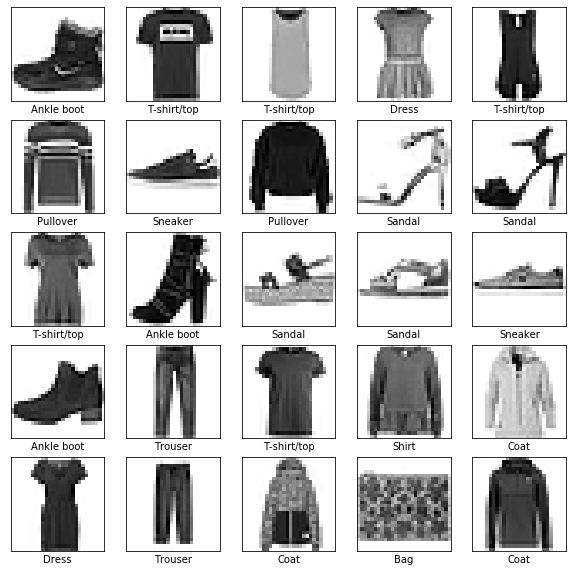

In [0]:
plt.figure(figsize=(10,10))
indices = np.random.choice(np.arange(60000), size=25, replace=False)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

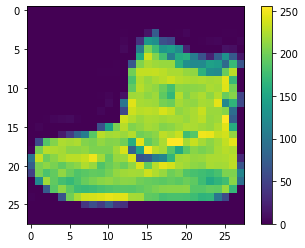

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Preprocess the data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Underfitting Model

## Build the model

Note: This Neural Network is greatly exaggerated to get an underfitting model.

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(5, activation='sigmoid'),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 56us/sample - loss: 1.3728 - acc: 0.6526 - val_loss: 0.9755 - val_acc: 0.7311
Epoch 2/20
60000/60000 [==============================] - 3s 50us/sample - loss: 0.8192 - acc: 0.7671 - val_loss: 0.7365 - val_acc: 0.7834
Epoch 3/20
60000/60000 [==============================] - 3s 49us/sample - loss: 0.6535 - acc: 0.8069 - val_loss: 0.6322 - val_acc: 0.8067
Epoch 4/20
60000/60000 [==============================] - 3s 49us/sample - loss: 0.5772 - acc: 0.8205 - val_loss: 0.5872 - val_acc: 0.8119
Epoch 5/20
60000/60000 [==============================] - 3s 48us/sample - loss: 0.5378 - acc: 0.8284 - val_loss: 0.5570 - val_acc: 0.8208
Epoch 6/20
60000/60000 [==============================] - 3s 48us/sample - loss: 0.5131 - acc: 0.8334 - val_loss: 0.5427 - val_acc: 0.8215
Epoch 7/20
60000/60000 [===========

## Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 24us/sample - loss: 0.5118 - acc: 0.8253
Test accuracy: 0.8253


## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

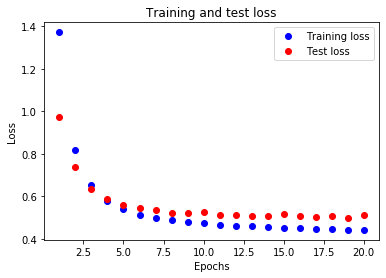

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

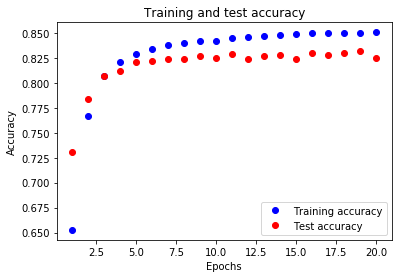

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The model did learn, however it underperforms compared to the other models provided in this notebook.

# Overfitting Model

## Build the model

Note: This model is also exaggerated such as to get a model that clearly overfits to the training dataset.

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(2048, activation=tf.nn.relu),
    keras.layers.Dense(2048, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 112s 2ms/sample - loss: 0.4743 - acc: 0.8276 - val_loss: 0.4072 - val_acc: 0.8494
Epoch 2/20
60000/60000 [==============================] - 112s 2ms/sample - loss: 0.3621 - acc: 0.8659 - val_loss: 0.3747 - val_acc: 0.8582
Epoch 3/20
60000/60000 [==============================] - 112s 2ms/sample - loss: 0.3235 - acc: 0.8809 - val_loss: 0.3710 - val_acc: 0.8688
Epoch 4/20
60000/60000 [==============================] - 113s 2ms/sample - loss: 0.2986 - acc: 0.8886 - val_loss: 0.3412 - val_acc: 0.8757
Epoch 5/20
60000/60000 [==============================] - 114s 2ms/sample - loss: 0.2836 - acc: 0.8928 - val_loss: 0.3488 - val_acc: 0.8742
Epoch 6/20
60000/60000 [==============================] - 114s 2ms/sample - loss: 0.2637 - acc: 0.9010 - val_loss: 0.3516 - val_acc: 0.8773
Epoch 7/20
60000/60000 [==============================] - 114s 2ms/sample - loss: 0.2527 - acc: 0.9042 - val_l

## Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 4s 411us/sample - loss: 0.4207 - acc: 0.8877
Test accuracy: 0.8877


## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

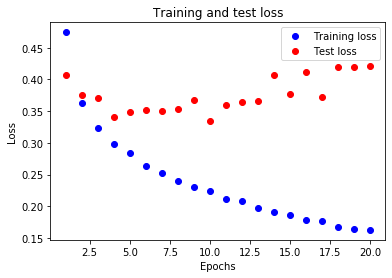

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

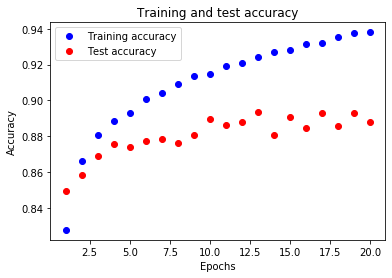

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

As can be seen from the above graphs, the network performed very well on the training dataset, however it started to overfit which can be seen by the large gap between the training and testing scores.

Note how the training accuracy score appears to still be rising while the test accuracy has appeared to flatline.

# Decent Model

## Build the model

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 180us/sample - loss: 0.5434 - acc: 0.8030 - val_loss: 0.4185 - val_acc: 0.8480
Epoch 2/20
60000/60000 [==============================] - 11s 178us/sample - loss: 0.4137 - acc: 0.8486 - val_loss: 0.3808 - val_acc: 0.8633
Epoch 3/20
60000/60000 [==============================] - 10s 173us/sample - loss: 0.3799 - acc: 0.8615 - val_loss: 0.3914 - val_acc: 0.8585
Epoch 4/20
60000/60000 [==============================] - 10s 167us/sample - loss: 0.3615 - acc: 0.8666 - val_loss: 0.3495 - val_acc: 0.8730
Epoch 5/20
60000/60000 [==============================] - 10s 171us/sample - loss: 0.3435 - acc: 0.8724 - val_loss: 0.3673 - val_acc: 0.8703
Epoch 6/20
60000/60000 [==============================] - 10s 170us/sample - loss: 0.3350 - acc: 0.8756 - val_loss: 0.3446 - val_acc: 0.8723
Epoch 7/20
60000/60000 [==============================] - 10s 172us/sample - loss: 0.3254 - acc: 0.8793 

## Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 60us/sample - loss: 0.3188 - acc: 0.8901
Test accuracy: 0.8901


## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

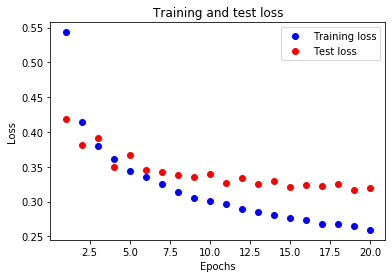

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

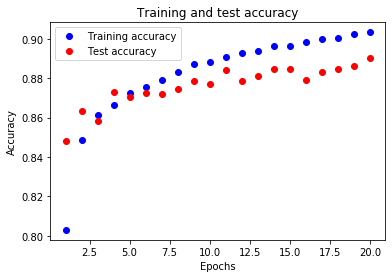

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The difference in testing performance scores between this and the overfitting model may be small, however the smaller gap between training and testing scores in this model indicates less overfitting is occurring.

Reducing the number of neurons per layer as well as adding Dropout between each layer fought overfitting on the training dataset. There is much less of a gap between the training and testing scores compared to the overfitting model.

This network could do even better by using a Convolutional Neural Network as opposed to strictly just Dense and Dropout layers.